Exercise 6

4.1 Plot the potential of the harmonic oscillator
with some different values for the force constant k.

In [51]:
# imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
import builtins

In [52]:
# constants
kT = 0.15
k_B = 1
x_extrema = 100
x0 = 0 # positional displacement
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 4000)  
spring_constants = [0.1, 1, 5]

Define functions, V and P

In [58]:
# Potential energy function, V(x)
def V(x, k, x0):
    return 0.5 * k * (x-x0)**2

# Probability distribution function, P(x)
def P(x, k, x0, kT):
    # inplicitely set kT = whatever the global variable kT is
    return np.sqrt(k / (2 * np.pi * kT)) * np.exp(-0.5 * (k * (x-x0)**2) / (kT))  # prob density


Thermally average energy by direct integration:

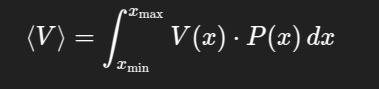

In [72]:
from scipy.integrate import quad

k = 1
kT = 0.15
x0 = 0
xmin = -5
xmax = 5
Z, _ = quad(P, xmin, xmax, args=(k, x0, kT))

def P_norm(x, k, x0, kT):          # normalized prob dist
    return P(x, k, x0, kT) / Z

def integrand(x, k, x0):       # indmaden af integralet
    return V(x, k, x0) * P_norm(x, k, x0, kT)

def direct_integration(k, x0, xmin, xmax,kT):
    def integrand_local(x):
        return V(x, k, x0) * P(x, k, x0, kT) / Z
    V_avg, _ = quad(integrand_local, xmin, xmax)
    return V_avg

V_avg, _ = quad(integrand, xmin, xmax, args=(k, x0))  
print(f"<V> by direct integration: {direct_integration(k,x0,xmin,xmax,kT)}")

<V> by direct integration: 0.07500000000000001


Plots, including thermally averaged potential energy by direct integration in a finite range from some x_min to x_max

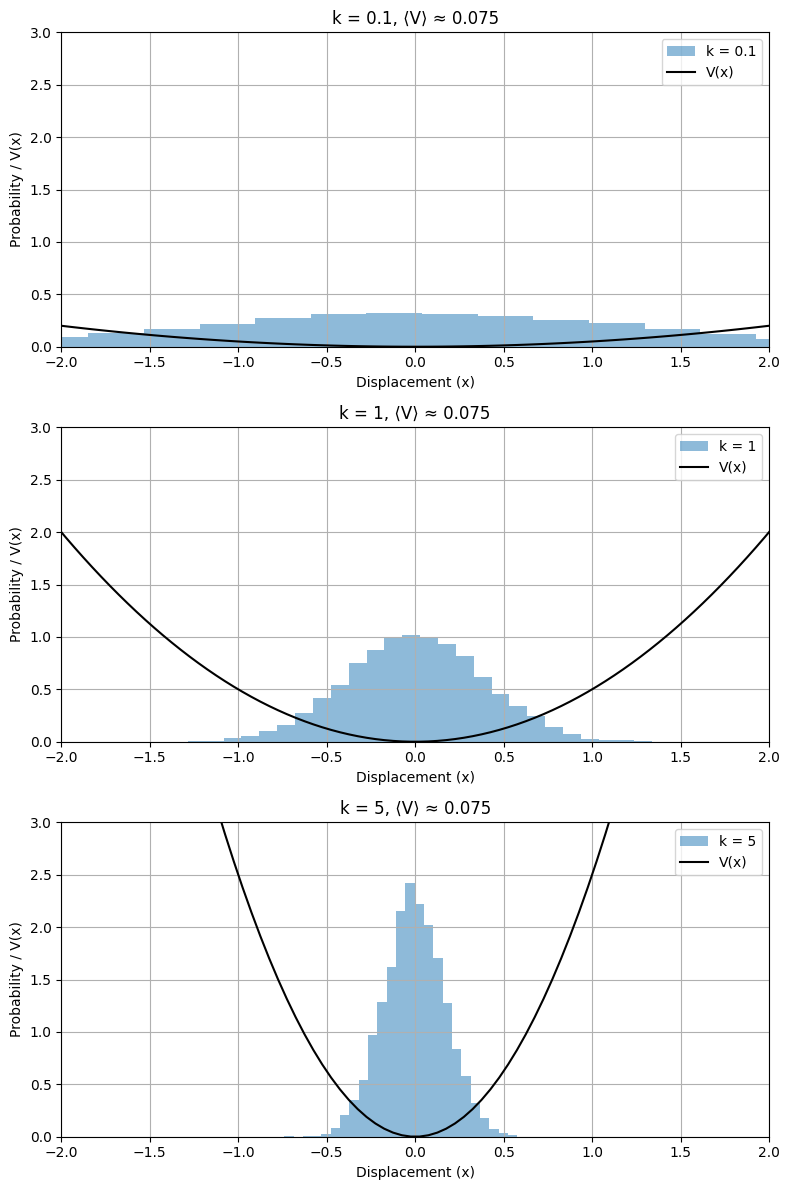

In [75]:
fig, axs = plt.subplots(len(spring_constants), 1, figsize=(8, 12))

for i, k in enumerate(spring_constants):
    std_dev = np.sqrt(kT / k)
    samples = np.random.normal(loc=x0, scale=std_dev, size=10000)

    # Compute thermal average
    V_avg = direct_integration(k, x0, xmin, xmax, kT)

    # Plot histogram
    axs[i].hist(samples, bins=30, density=True, alpha=0.5, label=f'k = {k}')
    axs[i].plot(x, V(x, k, x0), label='V(x)', color='black')

    axs[i].set_title(f'k = {k}, ⟨V⟩ ≈ {V_avg:.3f}')
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('Probability / V(x)')
    axs[i].set_xlim(-2, 2)
    axs[i].set_ylim(0, 3)
    axs[i].grid(True)
    axs[i].legend()

plt.tight_layout()
plt.savefig('classical_prob_dist_multiple_k.png')
plt.show()

Trying with different values of kT, i.e. different values of T. This shows that as the temperature increases, the system is able to access more states, i.e. it oscillates to higher displacements.

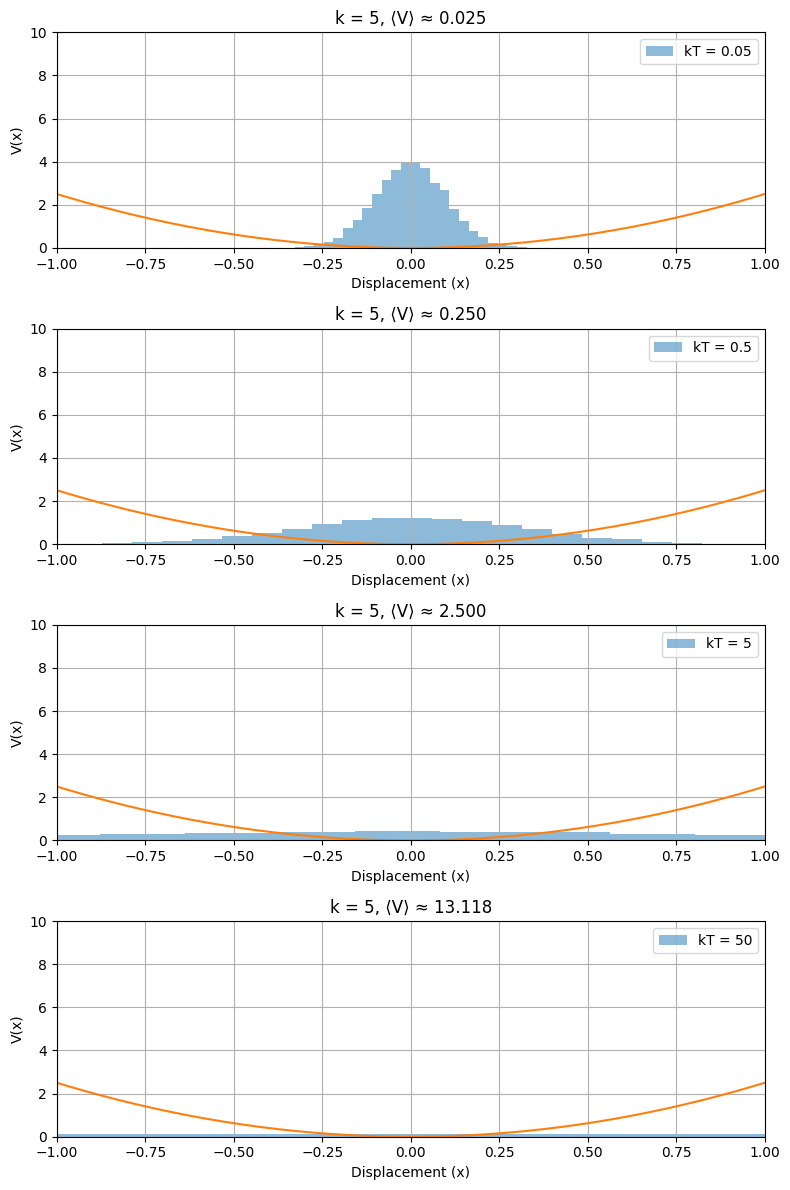

In [79]:
kTs = [0.05, 0.5, 5, 50]

fig, axs = plt.subplots(len(kTs), 1, figsize=(8, 12))

for i, kT in enumerate(kTs):
    std_dev = np.sqrt(kT / k)
    samples = np.random.normal(loc=x0, scale=std_dev, size=10000)  # Larger sample size for smooth histogram
    
    V_avg = direct_integration(k, x0, xmin, xmax, kT)
    axs[i].set_title(f'k = {k}, ⟨V⟩ ≈ {V_avg:.3f}')
    axs[i].hist(samples, bins=30, density=True, alpha=0.5, label=f'kT = {kT}')
    axs[i].plot(x,V(x,k,x0))
    axs[i].set_xlabel('Displacement (x)')
    axs[i].set_ylabel('V(x)')
    axs[i].set_xlim(-1,1)
    axs[i].set_ylim(0,10)
    axs[i].grid(True)
    axs[i].legend()
plt.tight_layout()
plt.savefig('classical_prob_dist_multiple_kT.png')
plt.show()


4.2 Direct Monte Carlo sampling

Evaluate the thermally avg pot energy by MC sampling.
Use a constant probability dist in a finite range as a known dist.

In [139]:
def direct_sampling(k,kT, x0, x_min,x_max,N=100000):
    xs = np.linspace(x_min, x_max, N)
    envelope = lambda x: np.exp(-0.5*k*(x-x0)**2/kT)
    sample = [x for x in xs if np.random.rand() < envelope(x)]
    print('sample size:', len(sample))
    rejection_rate = 1 - len(sample) / len(xs)
    print(f"Rejection Rate: {rejection_rate:.2%}")
    return np.array(sample)

In [93]:
def estimate_thermal_avg_V(accepted_samples, k):
    V_values = V(accepted_samples, k, x0)
    return np.mean(V_values)

In [ ]:
num_samples = 1000000
k = 1
kT = 0.15
x0 = 0
samples = direct_sampling(k,kT,x0,x_min,x_max,num_samples)
thermal_avg_V = estimate_thermal_avg_V(samples,k)
print(f"Estimated thermally avg pot energy: {thermal_avg_V} J")
print(f"Theoretical ⟨V⟩ = {0.5 * kT} J")

sample size: 4867
Rejection Rate: 99.51%
Estimated thermally avg pot energy: 0.07570550597329499 J
Theoretical ⟨V⟩ = 0.075 J


4.3 Heat cap of one harmonic osc by eval the thermally avg pot energy at some different temps and then taking the deriv numerically.

In [ ]:
h = 0.1
kT_eval = 10.15
kT = kT_eval+h
samples = direct_sampling(k,kT,x0,x_min,x_max,num_samples)
thermal_avg_V_plus = estimate_thermal_avg_V(samples,k)
V_dir_plus = direct_integration(k, x0, xmin, xmax,kT_eval+h)

kT = kT_eval-h
samples = direct_sampling(k,kT,x0,x_min,x_max,num_samples)
thermal_avg_V_minus = estimate_thermal_avg_V(samples,k)
V_dir_minus = direct_integration(k, x0, xmin, xmax,kT_eval-h)


derivative = (thermal_avg_V_plus - thermal_avg_V_minus) / (2*h)
derivate_direct = (V_dir_plus - V_dir_minus) / (2*h)
print(f'Heat capacity from numerical deriv of <V(x)> (MC sampling): {derivative}')
print(f'Heat capacity from numerical deriv of <V(x)> (Direct integration): {derivate_direct}')

sample size: 8984
Rejection Rate: 99.10%
sample size: 8871
Rejection Rate: 99.11%
Heat capacity from numerical deriv of <V(x)> (MC sampling): 0.48928402578815033
Heat capacity from numerical deriv of <V(x)> (Direct integration): 0.49999999894603797


4.4 Fluctuations: Evaluate the heat cap from fluctuations in the potential energy.

We can get the C_v from fluctuations:

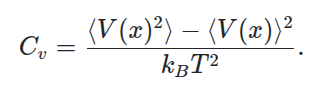

In [ ]:
def estimate_thermal_avg_V_sqrd(accepted_samples, k):
    V_values_sqrd = V(accepted_samples, k, x0)**2
    return np.mean(V_values_sqrd)

In [121]:
kT = 0.15
thermal_avg_V_sqrd = estimate_thermal_avg_V_sqrd(samples,k)
C_v = ( thermal_avg_V_sqrd - thermal_avg_V**2 ) / kT**2/k_B
print(f"Heat cap from fluctuations: {C_v}")
print(k_B)

Heat cap from fluctuations: -0.17826465435166686
1


Det korrekte result er fundet i ex6_working_T.ipynb, hvor jeg har brugt T=300 i stedet for kB=0.15 igennem hele opgaven.

IF TIME LEFT OVER: Lav plot som i Bjorks 4.3 Heat capacity!

Exercise 7

5.1 Two oscillators
a) consider two classical harmonic oscillators with k=1, x0=0 and k=10, x0=1, respectively. Plot the potentials.

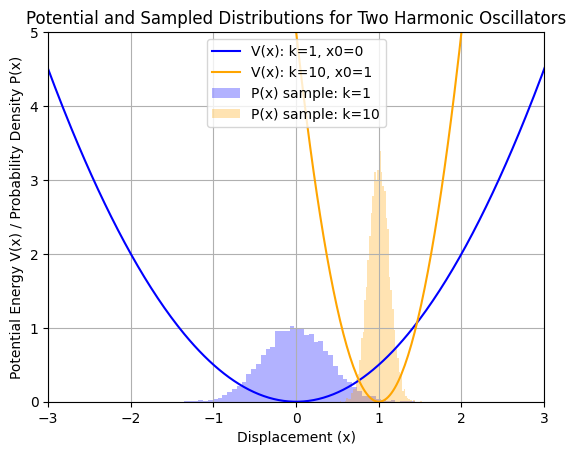

In [135]:
k_1 = 1
x0_1 = 0
k_2 = 10
x0_2 = 1
kT = 0.15

x_extrema = 4
x_min, x_max = -x_extrema, x_extrema  
x = np.linspace(x_min, x_max, 400)  # Generate 400 points from x_min to x_max

V1 = V(x, k_1, x0_1)
V2 = V(x, k_2, x0_2)

P1 = P(x, k_1, x0_1, kT)
P2 = P(x, k_2, x0_2, kT)

# Plot potential energy functions
plt.plot(x, V1, label=f'V(x): k={k_1}, x0={x0_1}', color='blue')
plt.plot(x, V2, label=f'V(x): k={k_2}, x0={x0_2}', color='orange')

# Overlay histograms
plt.hist(samples1, bins=50, density=True, alpha=0.3, color='blue', label=f'P(x) sample: k={k_1}')
plt.hist(samples2, bins=50, density=True, alpha=0.3, color='orange', label=f'P(x) sample: k={k_2}')

plt.xlabel('Displacement (x)')
plt.ylabel('Potential Energy V(x) / Probability Density P(x)')
plt.title('Potential and Sampled Distributions for Two Harmonic Oscillators')
plt.xlim(-3, 3)
plt.ylim(0, 5)
plt.grid(True)
plt.legend()
plt.savefig('harmonic_oscillators_with_sampled_prob.png')
plt.show()


b) Oscillators are in contact with heat bath with kT = 0.15 I think this is already the case for the above :)   
Evaluate the thermal avg potential energy for both oscillators using direct MC sampling.

In [143]:
num_samples = 1000000
kT = 0.15

#first oscillator
k = 1
x0 = 0
samples1 = direct_sampling(k,kT,x0,x_min,x_max,num_samples)
thermal_avg_V_1 = estimate_thermal_avg_V(samples1,k)

#second oscillator
k = 10
x0 = 1
samples2 = direct_sampling(k,kT,x0,x_min,x_max,num_samples)
thermal_avg_V_2 = estimate_thermal_avg_V(samples2,k)

print(f"Estimated thermally avg pot energy (dist around 0): {thermal_avg_V_1} J")
print(f"Theoretical ⟨V⟩ = {0.5 * kT} J")

print(f"Estimated thermally avg pot energy (dist around 1): {thermal_avg_V_2} J")
print(f"Theoretical ⟨V⟩ = {0.5 * kT} J")

sample size: 121681
Rejection Rate: 87.83%
sample size: 38395
Rejection Rate: 96.16%
Estimated thermally avg pot energy (dist around 0): 0.07541156649186771 J
Theoretical ⟨V⟩ = 0.075 J
Estimated thermally avg pot energy (dist around 1): 0.07401196865544175 J
Theoretical ⟨V⟩ = 0.075 J


5.2 Non-Boltzmann sampling

c) Now use the distribution from the first oscillator (the one at x0=0) to estimate the thermally averaged potential energy of the second oscillator (the one at x0=1). Increase the amount of sample points until you recover the result from question b).

We may write the thermal avg of an observable G(x) as <G(x)>=

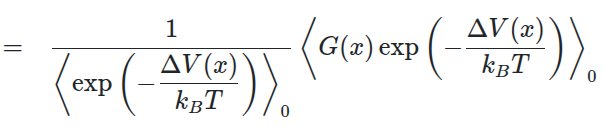

We already have samples from a different sys with pot V_0(x), but we want to compute the avg for a new sys with pot V(x). We can reuse the samples by adjusting tem with a correction factor.

I.e. adjust each sample by using 

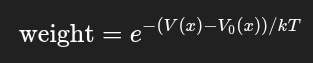

which will account for the fact that the samples are "wrong" for the sys being studied.

In [ ]:
#sample from distribution 1
samples1 = direct_sampling(k=1, kT=0.15, x0=0, x_min=-4, x_max=4, N=10000)

#def V and DeltaV
def V(x, k, x0):
    return 0.5 * k * (x - x0)**2

def deltaV(x):
    return V(x, k=10, x0=1) - V(x, k=1, x0=0)

#apply non-boltzmann sampling formula
kT = 0.15
exp_weight = np.exp(-deltaV(samples1) / kT)
numerator = np.mean(V(samples1, k=10, x0=1) * exp_weight)
denominator = np.mean(exp_weight)
thermal_avg_V_2_via_sampling = numerator / denominator

print(f"Estimated ⟨V⟩ of oscillator 2 via samples from oscillator 1: {thermal_avg_V_2_via_sampling:.5f}")
print(f"Theoretical ⟨V⟩ = {0.5 * kT:.5f}")

sample size: 1206
Rejection Rate: 87.94%
Estimated ⟨V⟩ of oscillator 2 via samples from oscillator 1: 0.07743
Theoretical ⟨V⟩ = 0.07500


But since the distributions have low overlap, the method is inefficient. So we need bigger sample size. Repeat above cell with N=10000000:

In [ ]:
#sample from distribution 1
samples1 = direct_sampling(k=1, kT=0.15, x0=0, x_min=-4, x_max=4, N=10000000)

#def
def V(x, k, x0):
    return 0.5 * k * (x - x0)**2

def deltaV(x):
    return V(x, k=10, x0=1) - V(x, k=1, x0=0)

#apply non-boltzmann sampling formula
kT = 0.15
exp_weight = np.exp(-deltaV(samples1) / kT)
numerator = np.mean(V(samples1, k=10, x0=1) * exp_weight)
denominator = np.mean(exp_weight)
thermal_avg_V_2_via_sampling = numerator / denominator

sample size: 1214293
Rejection Rate: 87.86%
Estimated ⟨V⟩ of oscillator 2 via samples from oscillator 1: 0.07529
Theoretical ⟨V⟩ = 0.07500


Exercise 8: Metropolis Monte Carlo

6.1 Metropolis Monte Carlo sampling: Establishing the sample {x_i} using Metropolis MC sampling. Dealing with one classical harmonic oscillator with k=1 and kT=0.15.

In [ ]:
# setting up for Metropolis MC sampling
import numpy as np
import matplotlib.pyplot as plt
import builtins

k = 1 
kT = 0.15  

x_min = -3
x_max = 3
x_points = 400

bin_number = 50

# Boltzmann distribution function based on the harmonic potential
def V(x, k, x0):
    return 0.5 * k * (x - x0)**2

def P(x, k, x0):
    return np.exp(-V(x, k, x0) / kT)

# Metropolis sampling function
def metropolis_sampling(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RNDn = np.random.randn() #random distribution "randn"
        proposed_x = current_x + Delta * RNDn

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0) / P(current_x, k, x0))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)


6.2 Random walk transitions I: vary N

/tmp/ipykernel_785784/4204253940.py:14: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


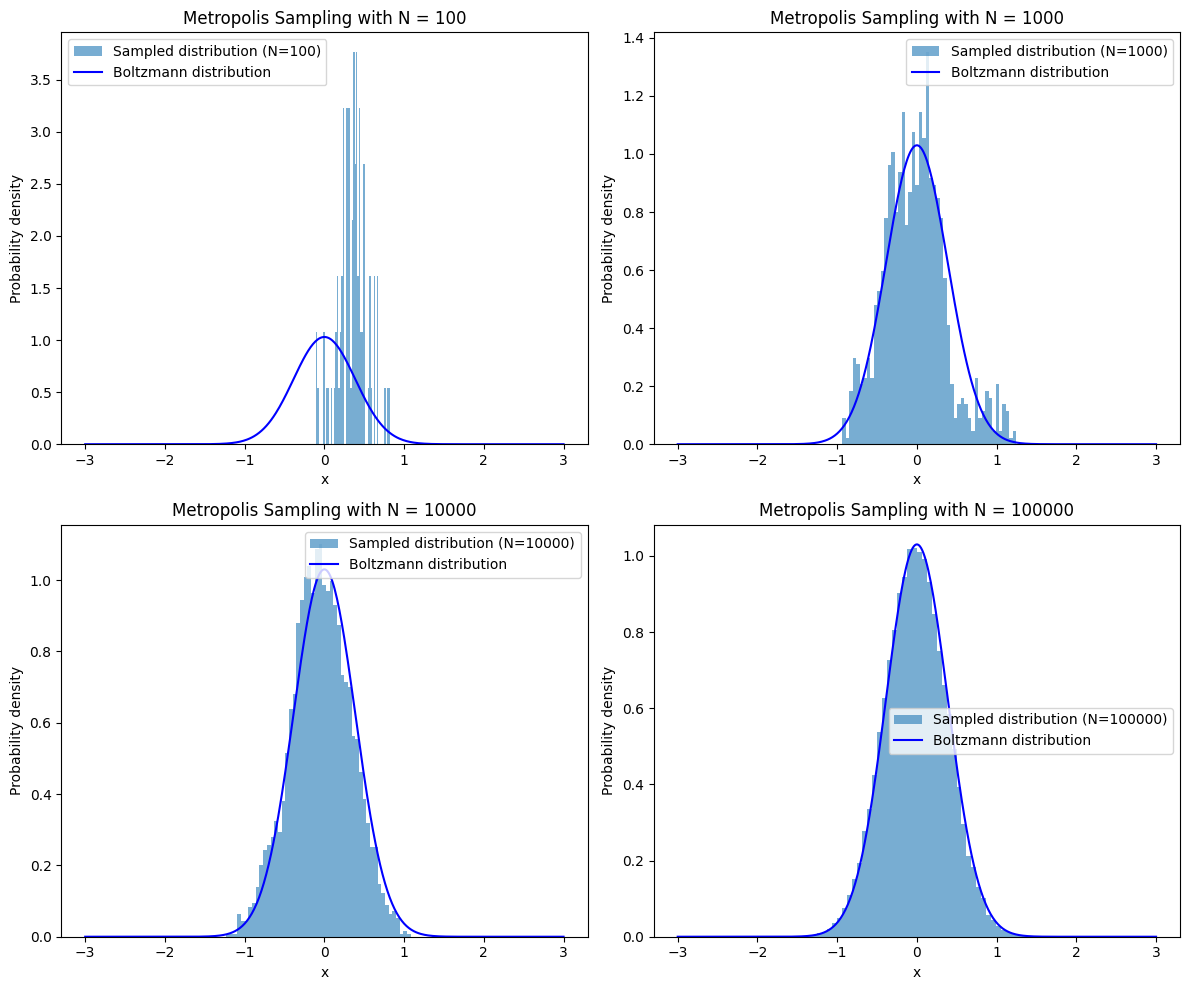

In [158]:
# Initial position
x0 = 0.0
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each N value, plot the results in corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

plt.tight_layout()
plt.show()


6.3 Random walk transitions II: vary Delta

/tmp/ipykernel_785784/905917685.py:15: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


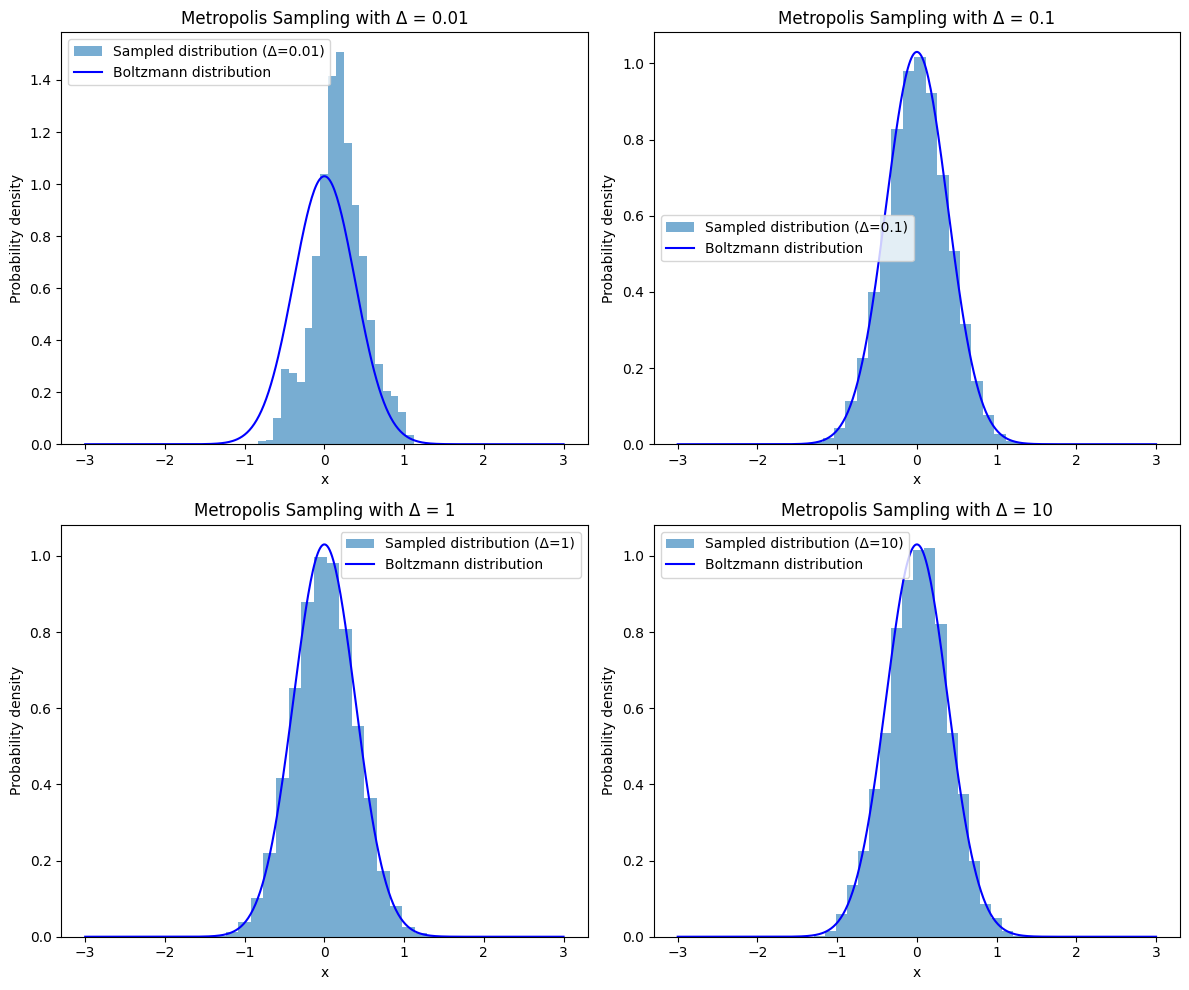

In [ ]:
# Initial position
x0 = 0.0
N = 100000

Delta_values = [0.01, 0.1, 1, 10]

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, Delta in enumerate(Delta_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=20, density=True, label=f"Sampled distribution (Δ={Delta})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with Δ = {Delta}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


6.4 Uniform transitions

/tmp/ipykernel_785784/2422524472.py:35: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")


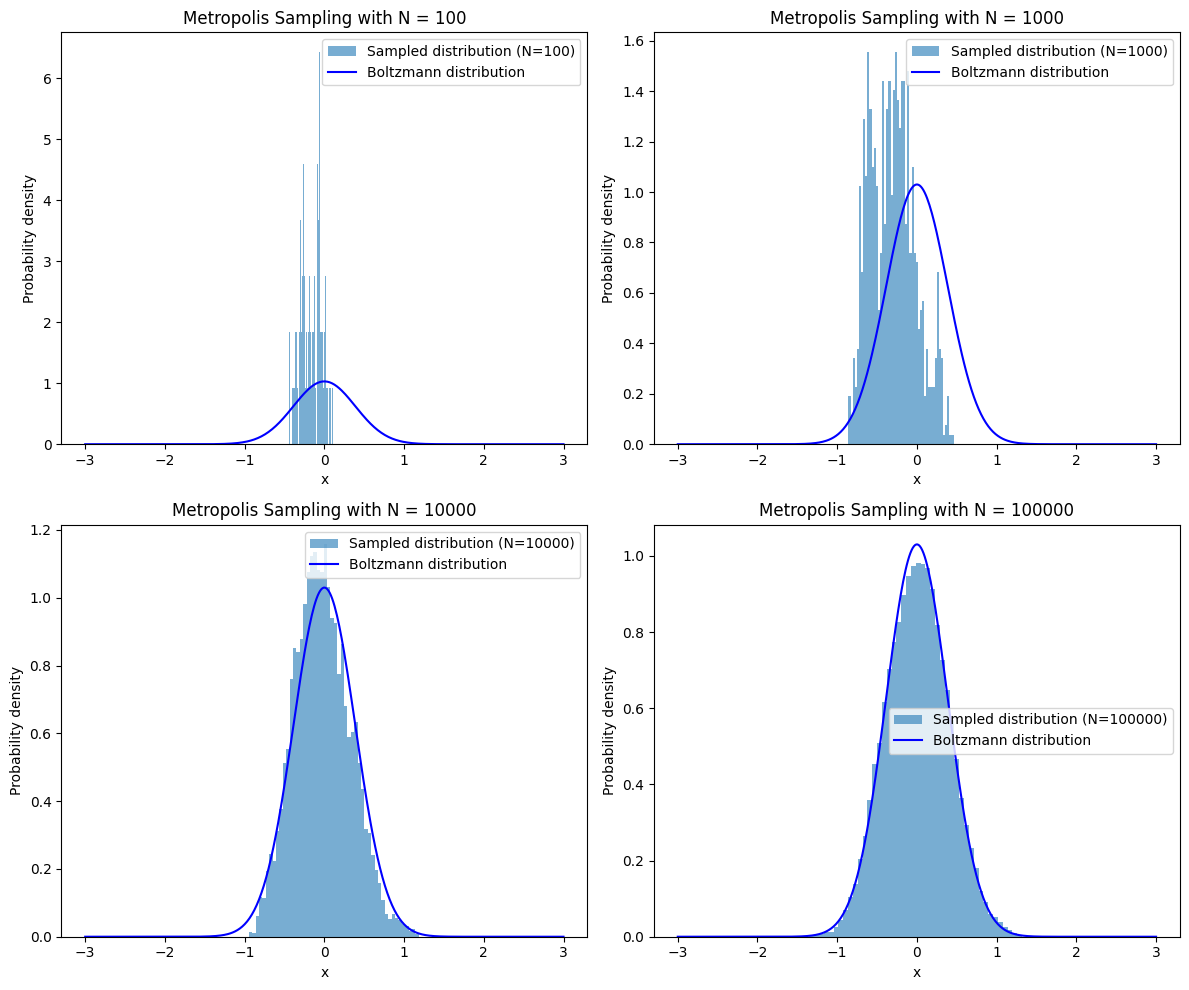

In [159]:
# Metropolis sampling function
def metropolis_sampling_alt(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + Delta * N(0,1)
        delta = np.random.uniform(-Delta, Delta)
        proposed_x = current_x + delta

        # Acceptance probability (min(1, P(x') / P(x)))
        acceptance_prob = min(1, P(proposed_x, k, x0) / P(current_x, k, x0))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)

# Initial position
x0 = 0.0
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling_alt(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, P(xs, k, x0) / np.trapz(P(xs, k, x0), xs), label="Boltzmann distribution", color="blue")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


Exercise 9

7.1 Metropolis Monte Carlo sampling: In this exercise we continue making the sample, {x_i}, using the Metropolis Monte Carlo sampling scheme. However, this time you should invent your own one-dimensional potential. I have made one from two downward-pointing Gaussians. But, please make your own personal choice. (I choose LJ pot).

7.2 Random walker transitions I:
Metropolis MC using Lennard-Jones potential

<function matplotlib.pyplot.show(close=None, block=None)>

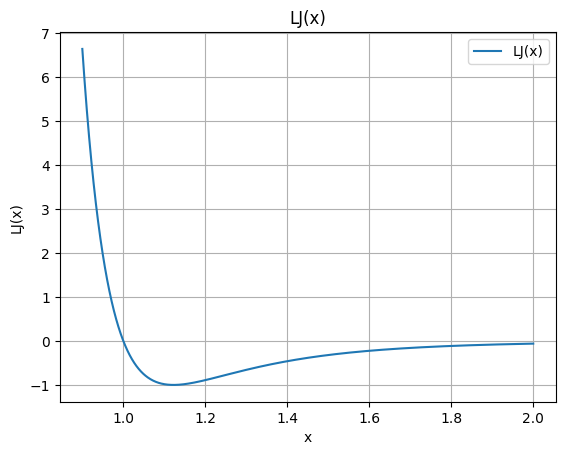

In [160]:
#plot LJ_pot
def LJ_pot(r, epsilon=1.0, sigma=1.0):
    """
    Lennard-Jones potential function V(r) = 4*epsilon * [(sigma/r)^12 - (sigma/r)^6]
    :param r: Distance between particles
    :param epsilon: Depth of well
    :param sigma: Distance where pot=0
    :return: Potential energy at distance r
    """
    return 4 * epsilon * ((sigma / r)**12 - (sigma / r)**6)

xs = np.linspace (0.9,2,1000)
y = LJ_pot(xs)

plt.plot(xs,y, label='LJ(x)')
plt.title('LJ(x)')
plt.xlabel('x')
plt.ylabel('LJ(x)')
plt.legend()
plt.grid(True)
plt.show

The following metropolis sampling method is specifically for the LJ pot where I have added a domain check:

In [176]:
def metropolis_sampling(x0, N, Delta):
    samples = []
    current_x = x0
    accepted = 0

    for _ in range(N):
        proposed_x = current_x + Delta * np.random.randn()

        # Domain check to avoid divergence
        if proposed_x <= 0.8 or proposed_x >= 2.5:
            samples.append(current_x)
            continue

        # Energy and acceptance
        delta_E = LJ_pot(proposed_x) - LJ_pot(current_x)
        acceptance_prob = min(1, np.exp(-delta_E / kT))

        if np.random.rand() < acceptance_prob:
            current_x = proposed_x
            accepted += 1

        samples.append(current_x)

    acceptance_rate = accepted / N
    return np.array(samples), acceptance_rate


/tmp/ipykernel_785784/12651790.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


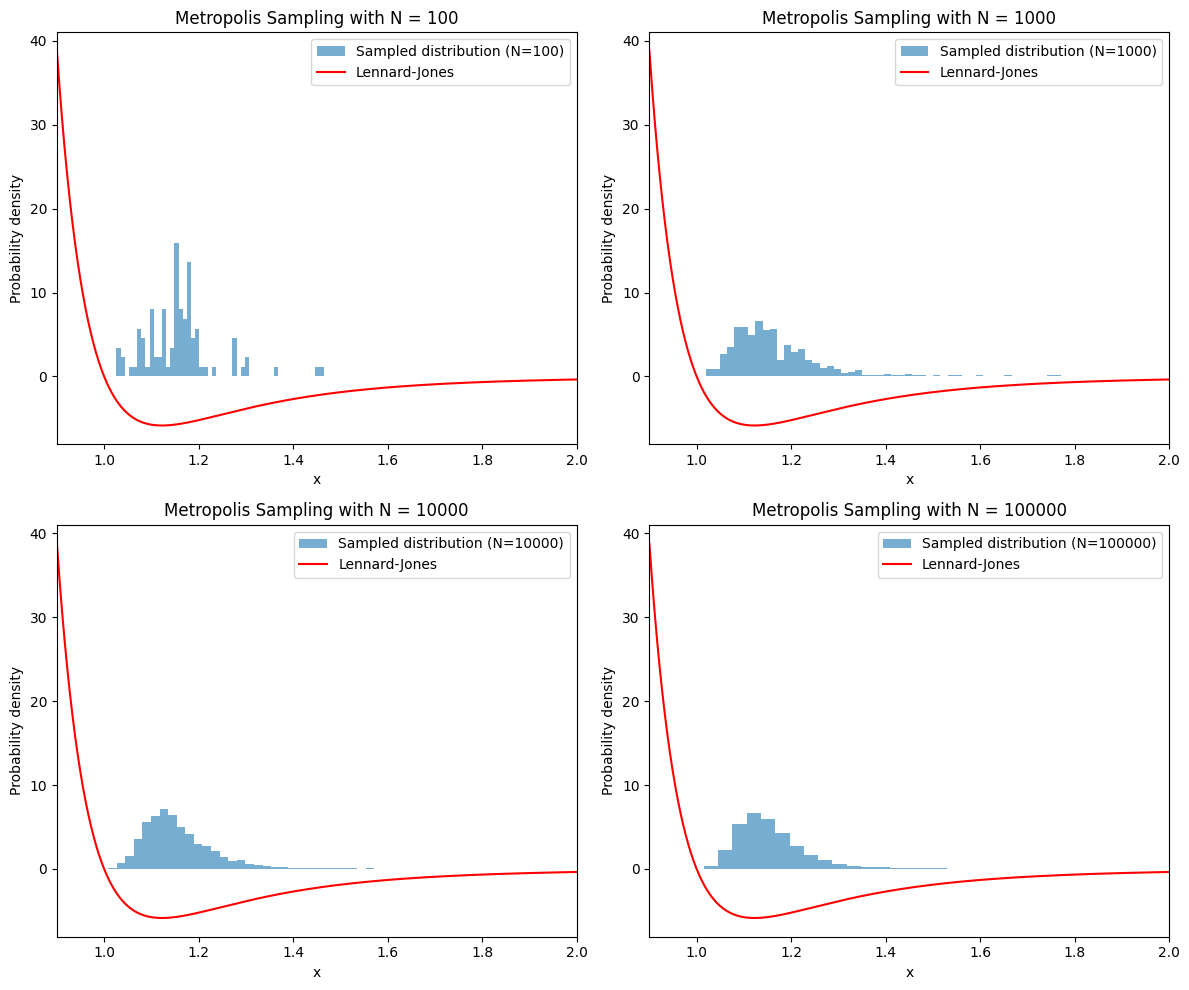

In [168]:
# Initial position
x_min = 0.9
x_max = 2.0
x0 = (x_max+x_min)/2
N_values = [100, 1000, 10000, 100000]
Delta = 0.1

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, 1000)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].set_xlim(0.9,2.0)
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


7.3 Random walk transitions II: smaller Δ

Δ controls the scale of movement in each proposed step:

Large Δ → big jumps

Small Δ → tiny wiggles

/tmp/ipykernel_785784/4086754641.py:16: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


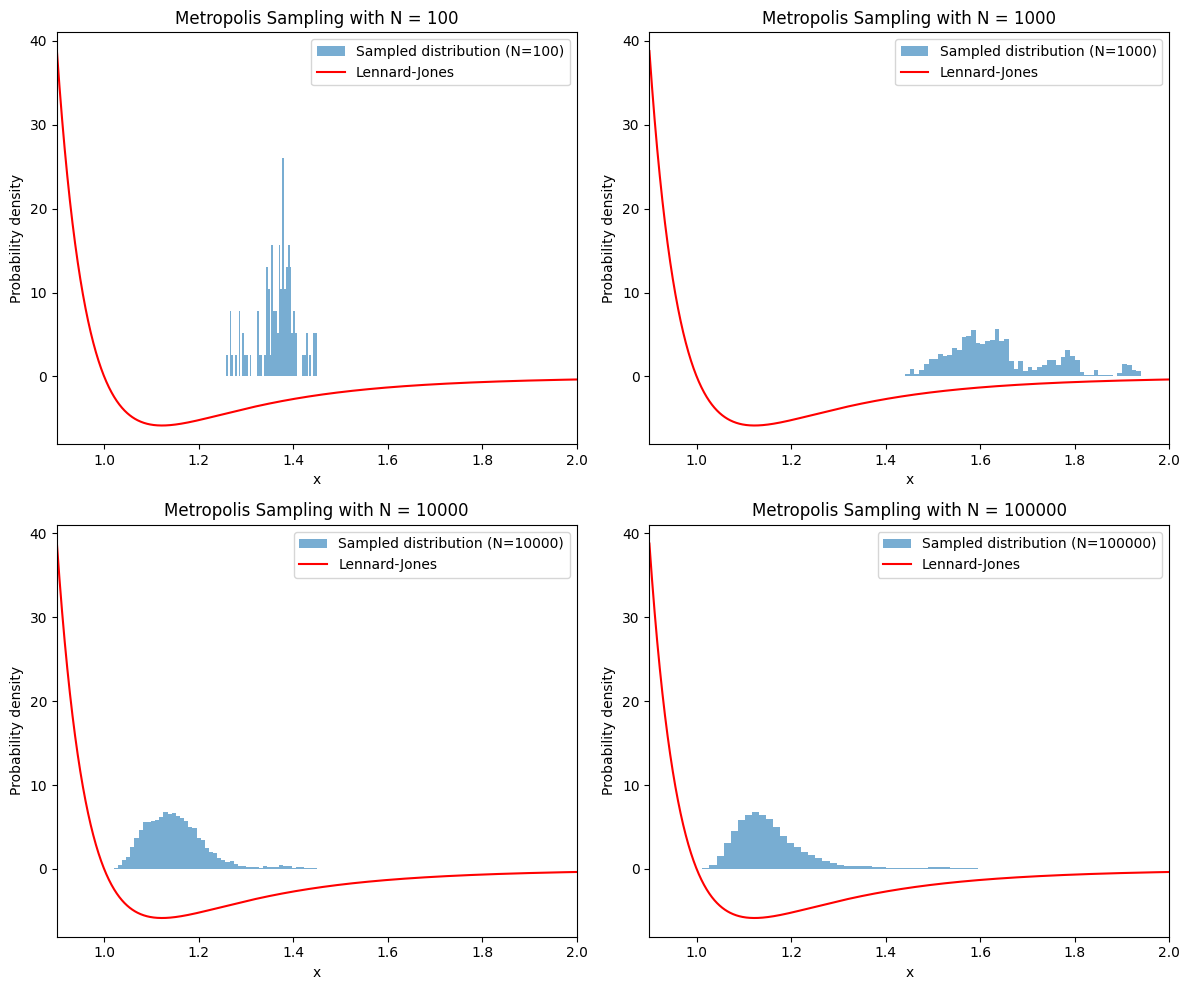

In [172]:
# Initial position
x_min = 0.9
x_max = 2.0
x0 = (x_max+x_min)/2
N_values = [100, 1000, 10000, 100000]
Delta = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, 1000)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].set_xlim(0.9,2.0)
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


When Δ is too small, almost all moves are accepted, i.e. high acceptance rate. 

Leads to slow exploration of energy landscape and samples are highly correlated (insufficient smapling). The distribution will converge slowly to the true equilibrium.

When Δ is too large, gets rejected often, jump into walls (high energy areas), repeats the same position. 

Leads to low acceptance rate, samples getting stuck, and again slow convergence because we wast most steps.


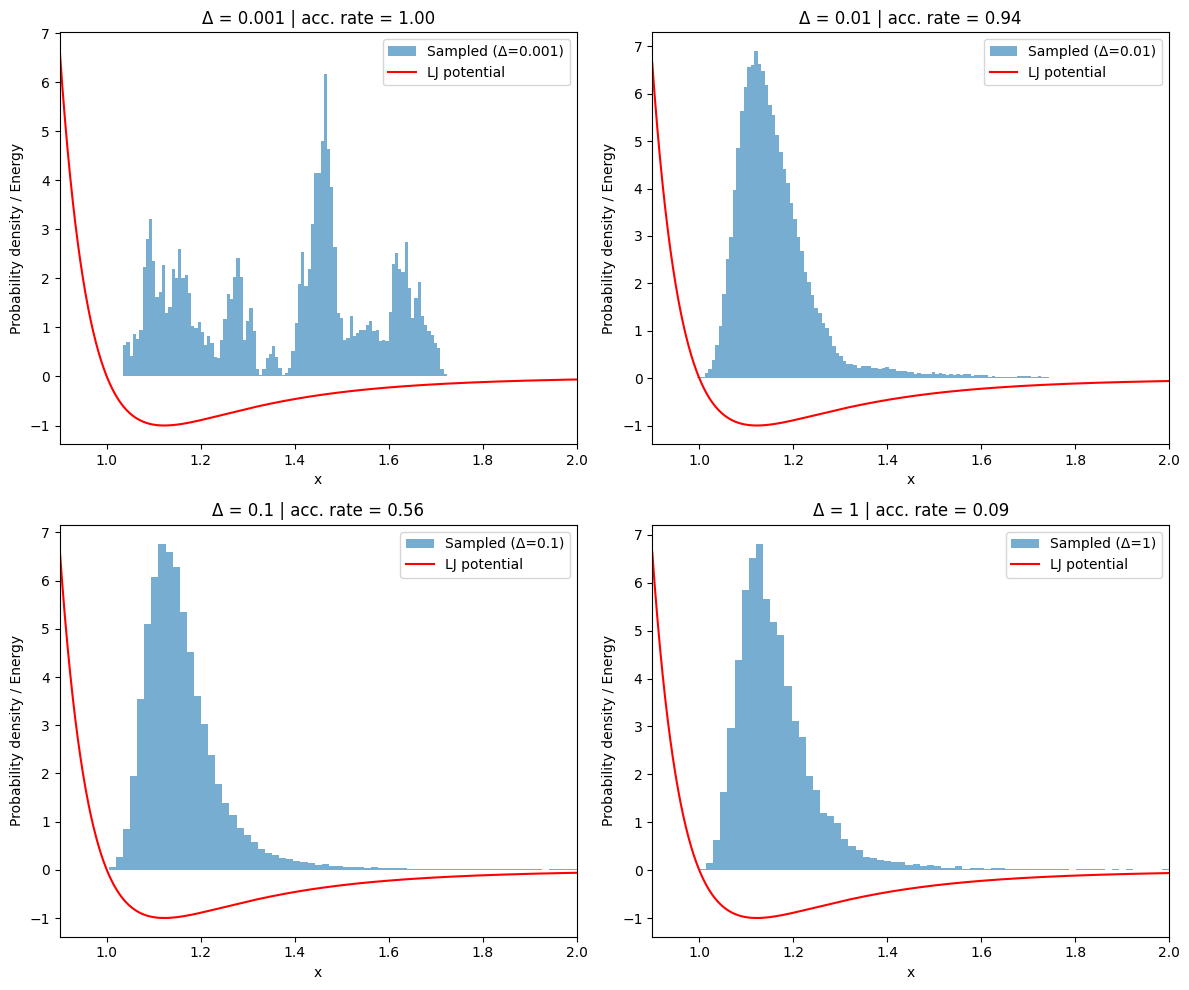

In [177]:
# Fixed parameters
x_min = 0.9
x_max = 2.0
x0 = (x_max + x_min) / 2
N = 100_000
Delta_values = [0.001, 0.01, 0.1, 1]
bin_number = 100
xs = np.linspace(x_min, x_max, 1000)

# Plotting setup
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, Delta in enumerate(Delta_values):
    samples, acc_rate = metropolis_sampling(x0, N, Delta)

    # Histogram of samples
    axes[i].hist(samples, bins=bin_number, density=True,
                 label=f"Sampled (Δ={Delta})", alpha=0.6)

    # Red Lennard-Jones potential
    axes[i].plot(xs, LJ_pot(xs), color="red", label="LJ potential")

    # Axis labels and title including acceptance rate
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density / Energy')
    axes[i].set_title(f'Δ = {Delta} | acc. rate = {acc_rate:.2f}')
    axes[i].set_xlim(0.9, 2.0)
    axes[i].legend()

# Layout adjustment
plt.tight_layout()
plt.show()



For the very small Delta, the walker is barely moving and the samples are extremely correlated (not effectively exploring).

Every move is accepted because the new proposed x' is extremely close to the current x, so the energy change is almost zero giving 

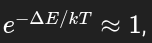

7.4 Uniform transitions: LJ pot

/tmp/ipykernel_785784/990279948.py:46: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")


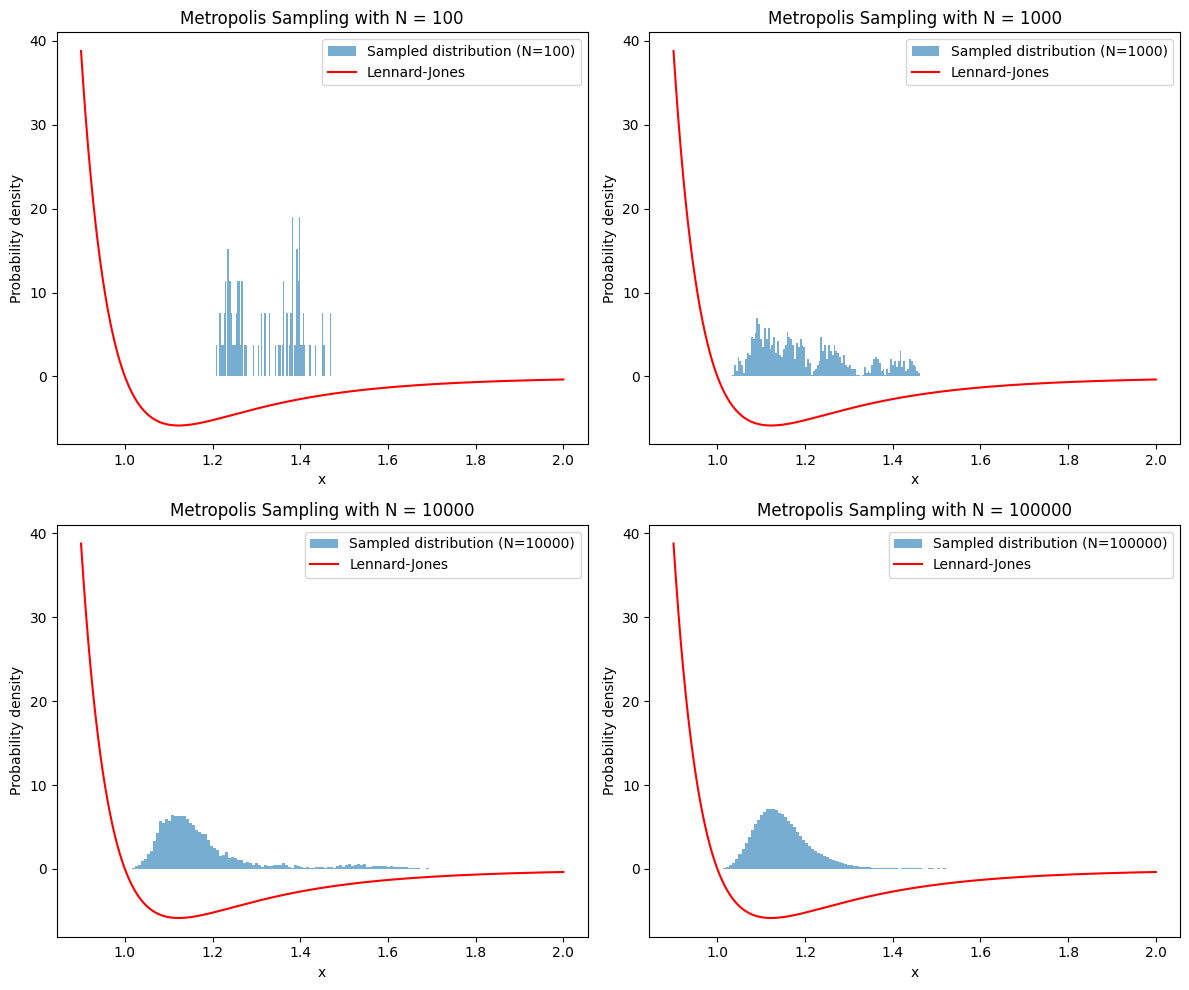

In [189]:
# Uniform Metropolis sampling function for LJ potential
def metropolis_sampling_alt(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RND = np.random.rand()  # Random distribution "randn"
        proposed_x = current_x + Delta * np.random.randn()


        # Reject if proposed_x is out of physical range
        if proposed_x <= 0.8 or proposed_x >= 2.5:
            samples.append(current_x)
            continue  # Reject this proposal immediately
        
        # Calculate potential energy at current and proposed positions
        current_pot = LJ_pot(current_x)
        proposed_pot = LJ_pot(proposed_x)

        # Acceptance probability (min(1, exp(-(V(x') - V(x)) / kT)))
        delta_E = proposed_pot - current_pot
        acceptance_prob = min(1, np.exp(-delta_E / kT))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)


# Initial position
N_values = [100, 1000, 10000, 100000]
Delta = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling_alt(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, LJ_pot(xs) / -np.trapz(LJ_pot(xs), xs), label="Lennard-Jones", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


Exercise 10

8.1 Metropolis Monte Carlo sampling

In this exercise we continue making the sample, {x_i}, using the Metropolis Monte Carlo sampling scheme. Make yet another interesting choice of potential. Stick to the uniform transitions.



In [192]:
# Interesting choice of potential: Mexican Hat
def mexican_hat(x):
    V = 1 - np.cos(10*x)
    return V

In [190]:
# Uniform Metropolis sampling function for Mexican Hat
def metropolis_sampling_uni(x0, N, Delta):
    samples = []
    current_x = x0
    for _ in builtins.range(N):
        # Propose new x' using random walk: x' = x + delta * N(0,1)
        RND = np.random.rand()  # Random distribution "randn"
        proposed_x = current_x + Delta * np.random.randn()
        
        # Calculate potential energy at current and proposed positions
        current_pot = mexican_hat(current_x)
        proposed_pot = mexican_hat(proposed_x)

        # Acceptance probability (min(1, exp(-(V(x') - V(x)) / kT)))
        delta_E = proposed_pot - current_pot
        acceptance_prob = min(1, np.exp(-delta_E / kT))

        # Accept or reject the new position
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x  # Accept the move

        # Store the current position
        samples.append(current_x)

    return np.array(samples)

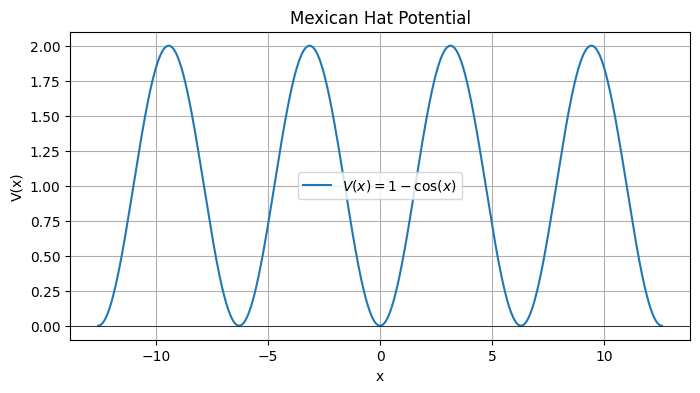

In [185]:
# Define x range and potential
x = np.linspace(-4*np.pi, 4*np.pi, 1000)
V = mexican_hat(x)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, V, label=r'$V(x) = 1 - \cos(x)$')
plt.title("Mexican Hat Potential")
plt.xlabel("x")
plt.ylabel("V(x)")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


8.2 P(x) for different temperatures

Make the probability distribution for different temperatures.

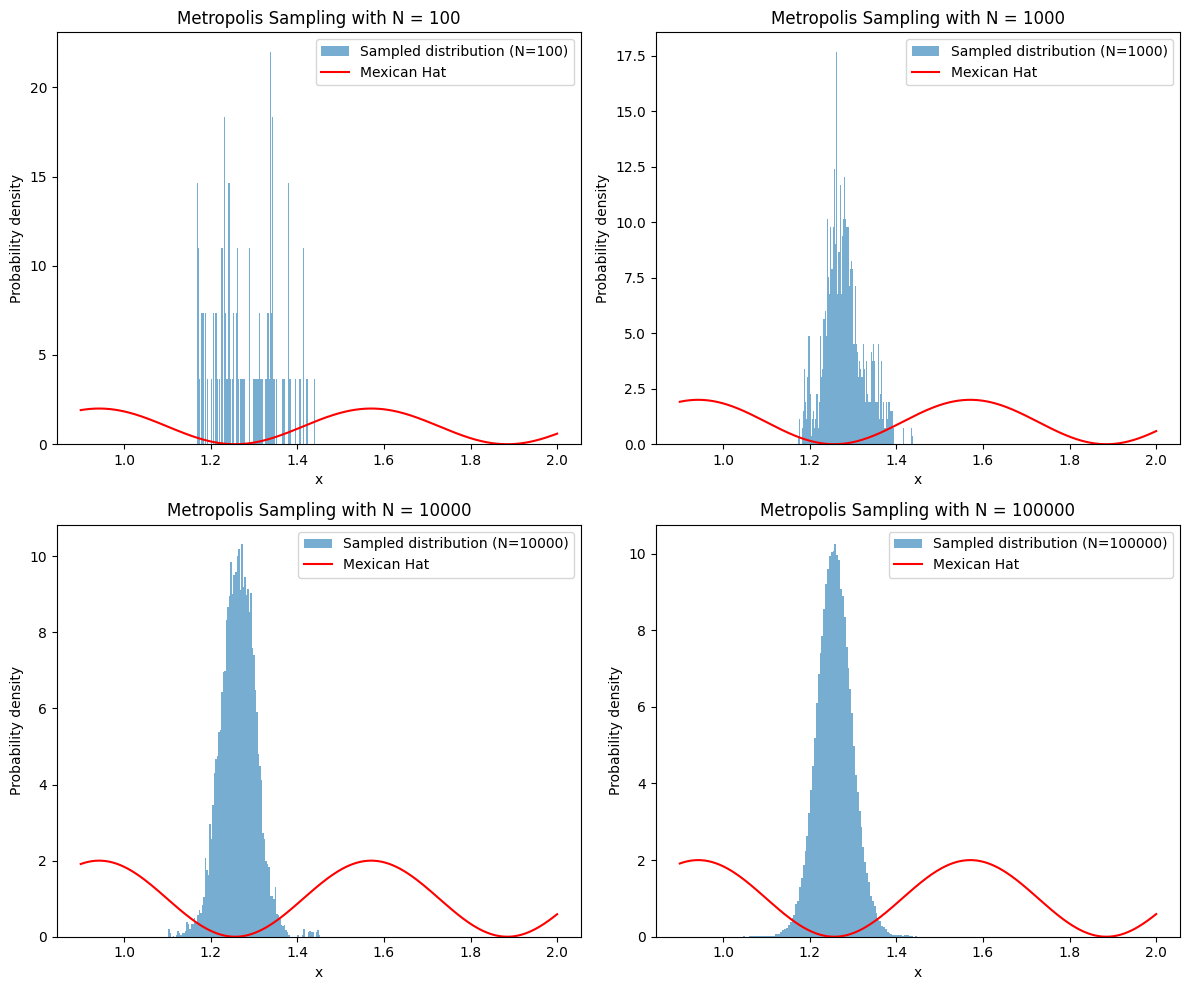

In [193]:
# Initial position
N_values = [100, 1000, 10000, 100000]
Delta = 0.01

fig, axes = plt.subplots(2, 2, figsize=(12, 10)) #this is the right way to do it!
axes = axes.flatten()
xs = np.linspace(x_min, x_max, x_points)

# Loop over each Delta value, plot the results in the corresponding subplot
for i, N in enumerate(N_values):
    samples = metropolis_sampling_uni(x0, N, Delta)
    axes[i].hist(samples, bins=bin_number, density=True, label=f"Sampled distribution (N={N})", alpha=0.6)
    axes[i].plot(xs, mexican_hat(xs), label="Mexican Hat", color="red")

    # Set labels and title for each subplot
    axes[i].set_xlabel('x')
    axes[i].set_ylabel('Probability density')
    axes[i].set_title(f'Metropolis Sampling with N = {N}')
    axes[i].legend()

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()
